In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import Audio

C:\Users\Lakshya\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import librosa
import librosa.display
import soundfile
import os, glob, pickle
#import keras

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
data_path=pd.read_csv('G:/project/data_path.csv')
data_path

Emotions                                               Path
0       neutral  G:/project/DATA/Ravdess/Actor_01/03-01-01-01-0...
1       neutral  G:/project/DATA/Ravdess/Actor_01/03-01-01-01-0...
2       neutral  G:/project/DATA/Ravdess/Actor_01/03-01-01-01-0...
3       neutral  G:/project/DATA/Ravdess/Actor_01/03-01-01-01-0...
4          calm  G:/project/DATA/Ravdess/Actor_01/03-01-02-01-0...
...         ...                                                ...
12157  surprise                  G:/project/DATA/Savee/KL_su11.wav
12158  surprise                  G:/project/DATA/Savee/KL_su12.wav
12159  surprise                  G:/project/DATA/Savee/KL_su13.wav
12160  surprise                  G:/project/DATA/Savee/KL_su14.wav
12161  surprise                  G:/project/DATA/Savee/KL_su15.wav

[12162 rows x 2 columns]

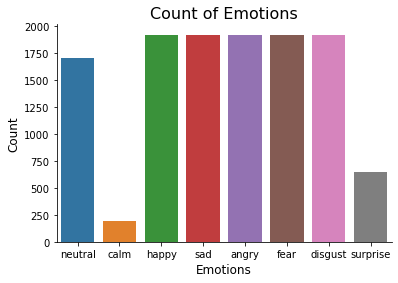

In [ ]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

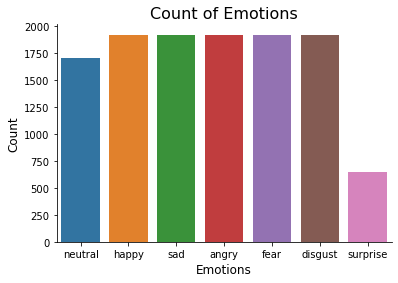

In [ ]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.feature.melspectrogram(data, center=True, n_fft=4096)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

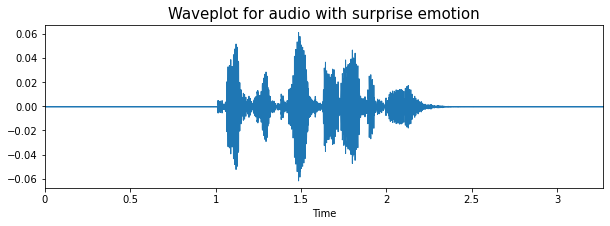

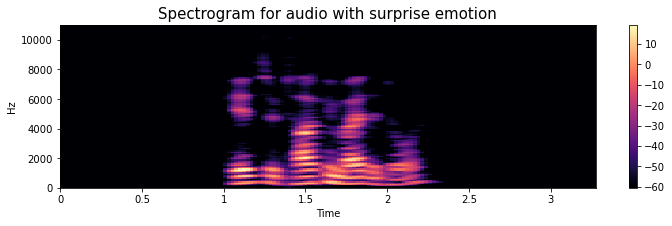

In [ ]:
emotion='surprise'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

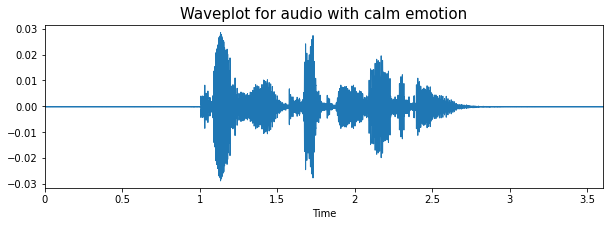

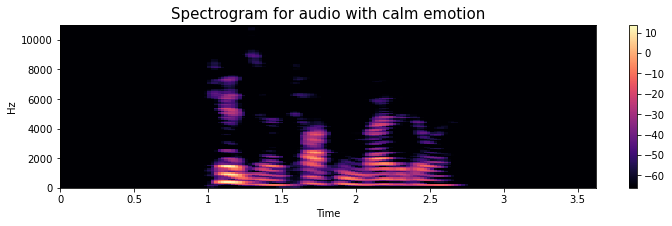

In [ ]:
emotion='calm'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

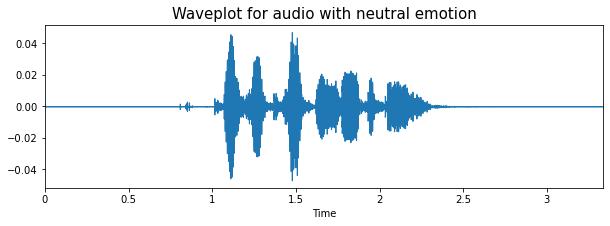

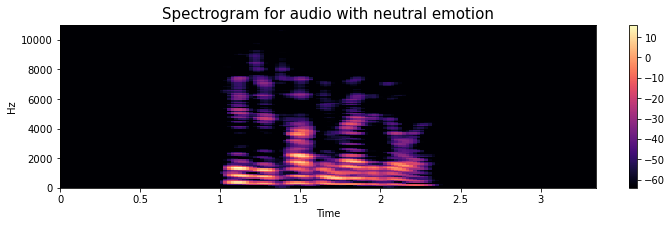

In [ ]:
emotion='neutral'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

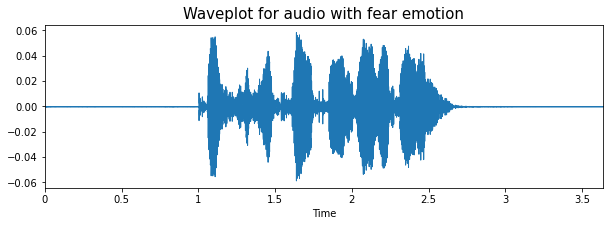

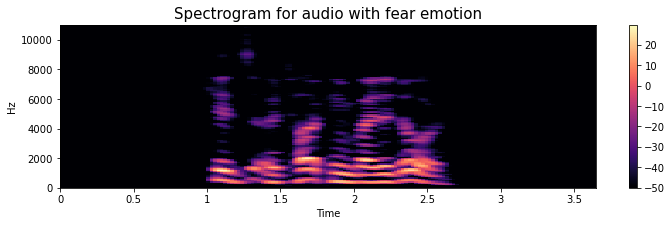

In [ ]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

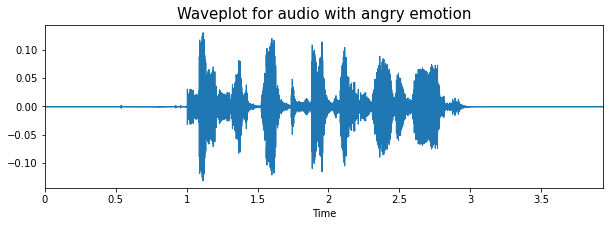

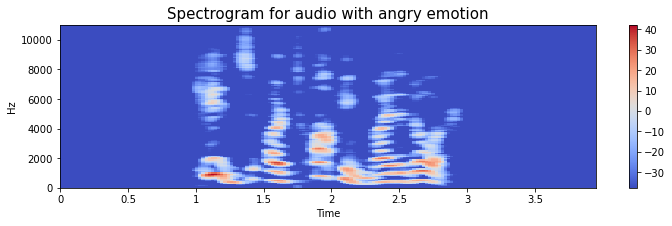

In [ ]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

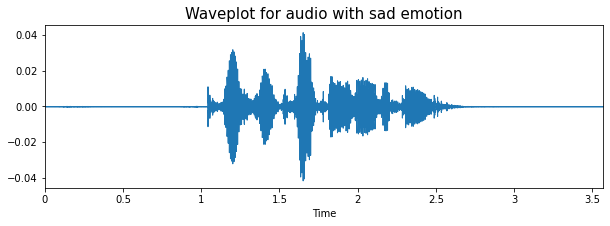

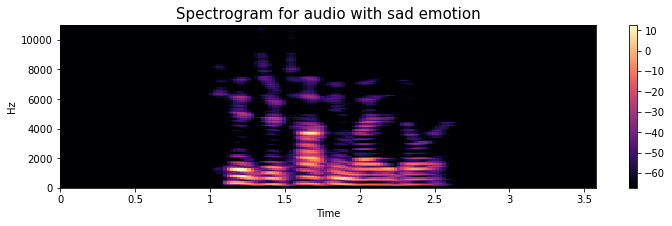

In [ ]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

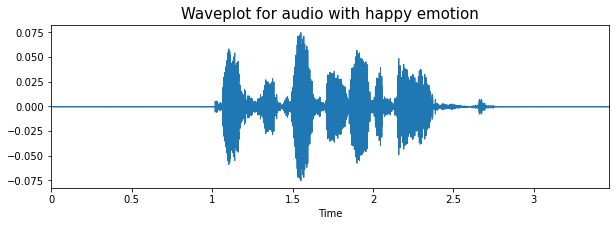

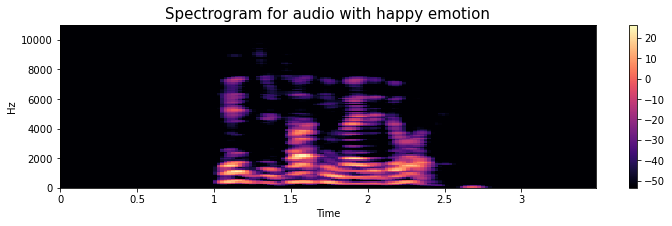

In [ ]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

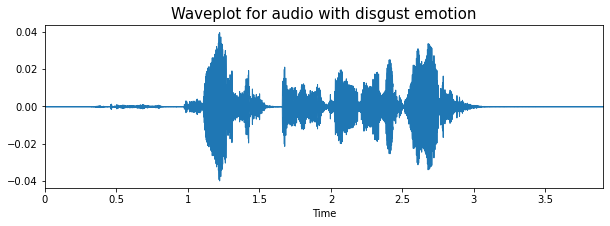

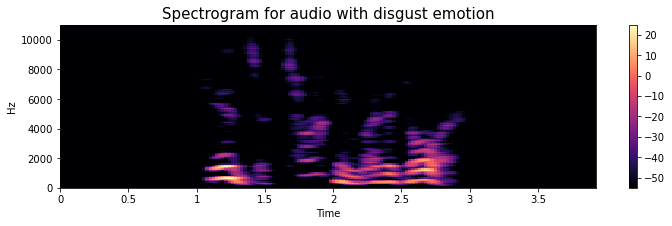

In [ ]:
emotion='disgust'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

In [ ]:
path

'G:/project/DATA/Ravdess/Actor_01/03-01-01-01-01-02-01.wav'

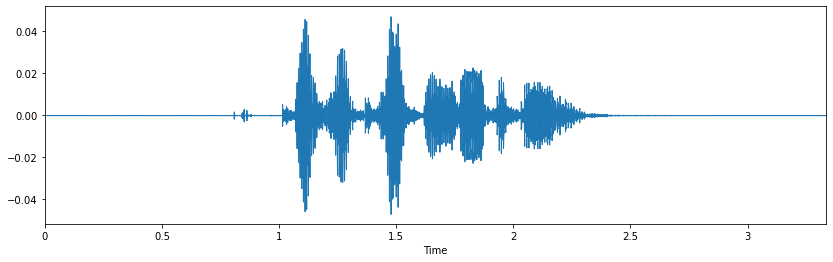

In [ ]:
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=data, sr=sample_rate)
Audio(path)

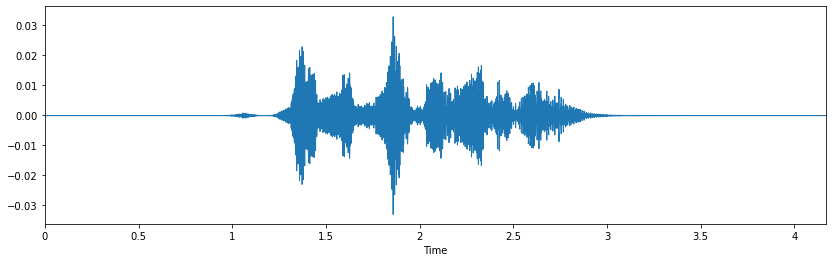

In [ ]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

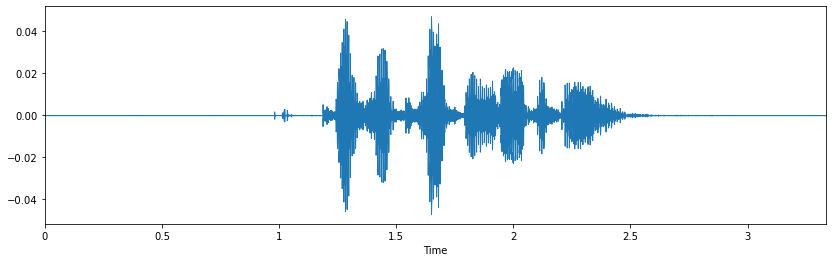

In [ ]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

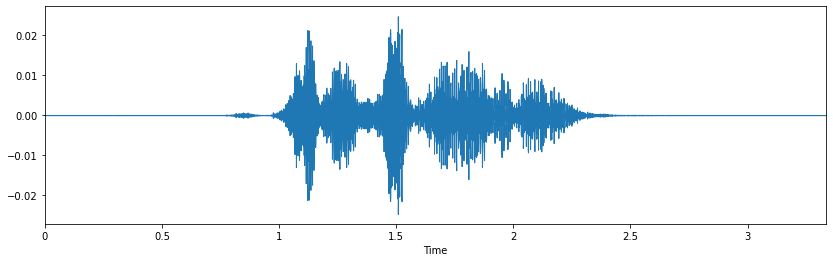

In [ ]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [ ]:
librosa.feature.

<module 'librosa.feature' from 'C:\\Users\\Lakshya\\Anaconda3\\lib\\site-packages\\librosa\\feature\\__init__.py'>

In [ ]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally
    
    # Chroma_cens
    chroma_cens = np.mean(librosa.feature.chroma_cens(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_cens)) # stacking horizontally
    
    # Spectral Centroid
    cen = np.mean(librosa.feature.spectral_centroid(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, cen)) # stacking horizontally
    
    # Spectral Bandwidth
    band = np.mean(librosa.feature.spectral_bandwidth(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, band)) # stacking horizontally
    
    # Spectral Contrast
    cont = np.mean(librosa.feature.spectral_contrast(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, cont)) # stacking horizontally\
    
    # Spectral Flatness
    flat = np.mean(librosa.feature.spectral_flatness(y=data).T, axis=0)
    result = np.hstack((result, flat)) # stacking horizontally

    # Spectral Rolloff
    roll = np.mean(librosa.feature.spectral_rolloff(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, roll)) # stacking horizontally
    
    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    # Tonnetz
    ton = np.mean(librosa.feature.tonnetz(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, ton)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
  #  create_spectrogram(data,sample_rate, e)
    # without augmentation
    
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    return np.array(mfcc)
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    #create_spectrogram(noise_data,sample_rate, e)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    #create_spectrogram(new_data,sample_rate, e)
    data_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    #create_spectrogram(data_pitch,sample_rate, e)
    data_shift=shift(data)
    #create_spectrogram(data_shift,sample_rate, e)
    res4 = extract_features(data_shift)
    result = np.vstack((result, res4)) # stacking vertically
    
    return result

In [ ]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

C:\Users\Lakshya\Anaconda3\lib\site-packages\scipy\sparse\lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):
C:\Users\Lakshya\Anaconda3\lib\site-packages\scipy\sparse\lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):
C:\Users\Lakshya\Anaconda3\lib\site-packages\librosa\core\pitch.py:146: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('G:/project/features.csv', index=False)
Features.head()

0          1         2          3          4         5         6  \
0 -646.141479  73.066635  0.403143  16.848040   9.805767  1.096762 -4.758567   
1 -634.959717  72.811455 -3.487025  20.697268  10.188319 -0.667841 -3.293634   
2 -643.539368  74.687790 -1.654425  16.667936   5.185095  0.672246 -4.452598   
3 -644.859009  69.573090  2.603384  16.992239   7.469007  2.995506 -2.625711   
4 -575.149292  87.505859 -7.242190  17.367668   4.752766 -4.243373 -8.880584   

          7          8         9  ...        11        12        13        14  \
0 -3.821856 -14.999225 -3.379040  ... -3.628368  2.119564 -4.571884  0.182455   
1 -7.447819 -16.703848 -2.161059  ... -3.714515  0.273591 -4.517451 -1.117246   
2 -7.804121 -15.013509 -5.399967  ... -4.113428  1.270108 -4.779651 -3.539862   
3 -7.836774 -13.316401 -4.526954  ... -2.389073 -0.242245 -3.906938 -2.942741   
4 -9.391901 -16.987337 -3.424149  ... -9.511481  0.778850 -6.519214 -4.102514   

         15         16        17        18        19   labels  
0  1.418681  -5.783636 -2.084640 -2.130159 -0.869078  neutral  
1  0.534381  -6.885532 -1.295200 -3.289555  0.756878  neutral  
2  1.090911  -7.247005 -4.063982 -0.514474  0.192339  neutral  
3  1.678184  -6.506072 -2.595646 -0.604484 -0.405804  neutral  
4  3.057028 -11.762109 -3.840445 -4.009185 -3.377505    happy  

[5 rows x 21 columns]

In [ ]:
len(Features)

11970